<a href="https://colab.research.google.com/github/kernelmans/my-ai-codes/blob/main/ai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import --> Define  --> Compile --> fit --> Predict

In [2]:
import tensorflow as tf
print(tf.__version__)

2.19.0


X = –1, 0, 1, 2, 3, 4

Y = –3, –1, 1, 3, 5, 7

We need to find relation/rules between X and Y


In [ ]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([Dense(units = 1, input_shape = [1])])
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype = float)

model.fit(xs,ys, epochs = 500)
print(model.predict(np.array([10.0])))

Predicted output is not exactly 19 because of 2 reasons:

1. Data used for training is very less.
2. The output is depicted from the probability of the model i.w it cannot be 100%. thus the output is never exact.

In [ ]:
d1 = Dense(units= 1, input_shape=[1])
model = Sequential([d1])
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.fit(xs, ys, epochs = 500)
print(model.predict([10.0]))
print("Here is what i learned: {}".format(d1.get_weights()))

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Données
xs = tf.constant([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=tf.float32)
ys = tf.constant([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=tf.float32)

# 2. Initialisation manuelle des paramètres
w = tf.Variable(tf.random.normal([1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")

# 3. Hyperparamètres
learning_rate = 0.01
epochs = 500

# Pour stocker l'historique
loss_history = []
weight_history = []
bias_history = []

# 4. Entraînement manuel
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Prédiction
        y_pred = w * xs + b

        # Perte (erreur quadratique moyenne)
        loss = tf.reduce_mean(tf.square(ys - y_pred))

    # Calcul du gradient
    gradients = tape.gradient(loss, [w, b])

    # Mise à jour des poids
    w.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])

    # Stocker pour visualisation
    loss_history.append(loss.numpy())
    weight_history.append(w.numpy()[0])
    bias_history.append(b.numpy()[0])

    # Affichage partiel
    if epoch % 50 == 0 or epoch == epochs - 1:
        print(f"Époch {epoch:3d} | Loss: {loss:.5f} | w: {w.numpy()[0]:.4f} | b: {b.numpy()[0]:.4f}")

# 5. Affichage final
print("\nModèle appris : y ≈ {:.4f} * x + {:.4f}".format(w.numpy()[0], b.numpy()[0]))

# 6. Graphiques
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(loss_history)
plt.title("Évolution de la perte")
plt.xlabel("Époch")
plt.ylabel("Loss")

plt.subplot(1, 3, 2)
plt.plot(weight_history)
plt.title("Poids appris (w)")

plt.subplot(1, 3, 3)
plt.plot(bias_history)
plt.title("Biais appris (b)")

plt.tight_layout()
plt.show()

In [ ]:
# 📌 Entraînement d'un neurone linéaire "under the hood" avec affichage complet
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Données d'entraînement
xs = tf.constant([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=tf.float32)
ys = tf.constant([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=tf.float32)

# 2. Paramètres initialisés
w = tf.Variable(tf.random.normal([1]), name="poids")
b = tf.Variable(tf.random.normal([1]), name="biais")

# 3. Hyperparamètres
learning_rate = 0.01
epochs = 500

# 4. Historique
history = {
    "Époch": [],
    "Perte (Loss)": [],
    "w": [],
    "b": [],
    "Grad(w)": [],
    "Grad(b)": []
}

# 5. Entraînement manuel
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = w * xs + b
        loss = tf.reduce_mean(tf.square(ys - y_pred))

    gradients = tape.gradient(loss, [w, b])
    w.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])

    # Stockage
    history["Époch"].append(epoch + 1)
    history["Perte (Loss)"].append(float(loss.numpy()))
    history["w"].append(float(w.numpy()[0]))
    history["b"].append(float(b.numpy()[0]))
    history["Grad(w)"].append(float(gradients[0].numpy()[0]))
    history["Grad(b)"].append(float(gradients[1].numpy()[0]))

# 6. Affichage complet sous forme de tableau Pandas
df = pd.DataFrame(history)
pd.set_option('display.max_rows', None)  # Affiche toutes les lignes

# 7. Affichage du tableau
df.head(20)  # Pour afficher d’abord les 20 premières

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf

# 1. Données d'entraînement (x, y)
xs = tf.constant([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=tf.float32)
ys = tf.constant([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=tf.float32)

# 2. Initialisation des variables : poids (w) et biais (b)
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# 3. Taux d'apprentissage
learning_rate = 0.01

# 4. Liste pour stocker les valeurs à chaque époque
history = []

# 5. Boucle d'entraînement manuelle
for epoch in range(1, 501):  # 500 époques
    with tf.GradientTape() as tape:
        y_pred = w * xs + b
        loss = tf.reduce_mean(tf.square(ys - y_pred))  # MSE

    dw, db = tape.gradient(loss, [w, b])  # gradients

    # Mise à jour
    w.assign_sub(learning_rate * dw)
    b.assign_sub(learning_rate * db)

    # Sauvegarde des résultats à chaque époque
    history.append({
        'Epoch': epoch,
        'Loss': float(loss.numpy()),
        'w': float(w.numpy()),
        'b': float(b.numpy()),
        'Grad(w)': float(dw.numpy()),
        'Grad(b)': float(db.numpy())
    })

# 6. Affichage sous forme de tableau
df = pd.DataFrame(history)
df.head(20)  # Affiche les 20 premières lignes (change à .tail() pour voir les dernières)

# Pour tout voir dans un tableau complet (optionnel)
# from IPython.display import display
# display(df)

,Epoch,Loss,w,b,Grad(w),Grad(b)
0,1,15.666667,0.176667,0.040000,-17.666668,-4.000000
1,2,12.569613,0.333878,0.073900,-15.721111,-3.390000
2,3,10.127992,0.473827,0.102406,-13.994896,-2.850566
3,4,8.202137,0.598459,0.126143,-12.463241,-2.373709
4,5,6.682162,0.709501,0.145666,-11.104160,-1.952337
5,6,5.481613,0.808482,0.161468,-9.898161,-1.580165
6,7,4.532469,0.896762,0.173984,-8.827946,-1.251617
7,8,3.781214,0.975544,0.183601,-7.878175,-0.961746
8,9,3.185741,1.045896,0.190663,-7.035245,-0.706166
9,10,2.712920,1.108767,0.195473,-6.287086,-0.480986


Model learned ->  Y = 2X -1

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


X = [-1, 3, 2, 7, 5]
Y = [1, 13, 10, 25, 19]
d1 = Dense(units = 1, input_shape = [1])
model = Sequential([d1])
model.compile(optimizer = "sgd", loss = "mean_squared_error")

xs = np.array([-1.0, 3.0, 2.0, 7.0, 5.0], dtype = float)
ys = np.array([1.0, 13.0, 10.0, 25.0, 19.0], dtype = float)

model.fit(xs, ys,epochs = 500)
print(model.predict(np.array([10.0])))
print("Model learned: {}".format(d1.get_weights()))

In [ ]:
Y = 3X + 4

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


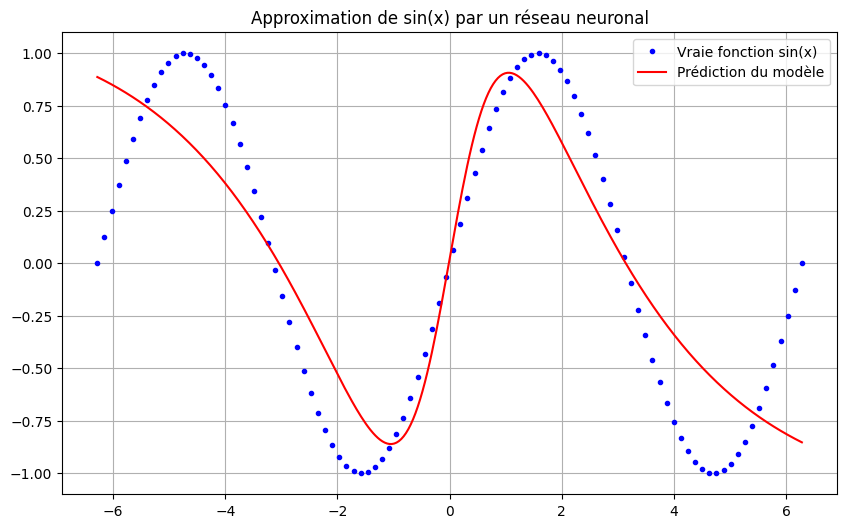

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 1. Données d'entraînement
xs = np.linspace(-2 * np.pi, 2 * np.pi, 100)
ys = np.sin(xs)

# 2. Création du modèle
model = Sequential([
    Dense(10, activation='tanh', input_shape=[1]),  # Couche cachée non linéaire
    Dense(1)  # Sortie
])

# 3. Compilation
model.compile(optimizer='adam', loss='mse')

# 4. Entraînement
history = model.fit(xs, ys, epochs=500, verbose=0)

# 5. Prédictions
x_test = np.linspace(-2*np.pi, 2*np.pi, 300)
y_pred = model.predict(x_test)

# 6. Affichage
plt.figure(figsize=(10,6))
plt.plot(xs, ys, 'b.', label='Vraie fonction sin(x)')
plt.plot(x_test, y_pred, 'r-', label='Prédiction du modèle')
plt.legend()
plt.title("Approximation de sin(x) par un réseau neuronal")
plt.grid(True)
plt.show()